In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

## Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
    

633

In [6]:
import requests

In [7]:
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):
    
#     # Group cities in sets of 50 for logging purposes.
#     if(i % 50 == 0 and i>= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]    

In [12]:
# Loop through all the cities in our list.
#for i, item in enumerate(list):
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 == 0 and i>= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")  
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping ....")
        pass
        
    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
    

Processing Record 1 of Set 1 | port antonio
Processing Record 2 of Set 1 | diebougou
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | tubuala
Processing Record 6 of Set 1 | atar
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | narsaq
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | dicabisagan
Processing Record 11 of Set 1 | beringovskiy
Processing Record 12 of Set 1 | husavik
Processing Record 13 of Set 1 | rabaul
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | sitka
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping ....
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | saint anthony
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | orsha
Processing Record 23 of Set 1 | klaksvik
Processing Record 24 of Set 1 | nizhneyansk
C

Processing Record 40 of Set 4 | olden
Processing Record 41 of Set 4 | naze
Processing Record 42 of Set 4 | lieksa
Processing Record 43 of Set 4 | san carlos de bariloche
Processing Record 44 of Set 4 | port-gentil
Processing Record 45 of Set 4 | sal rei
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | sinop
Processing Record 49 of Set 4 | ratne
Processing Record 50 of Set 4 | florida
Processing Record 1 of Set 5 | kabinda
Processing Record 2 of Set 5 | qaanaaq
Processing Record 3 of Set 5 | puerto madryn
Processing Record 4 of Set 5 | flin flon
Processing Record 5 of Set 5 | mbaiki
Processing Record 6 of Set 5 | padang
Processing Record 7 of Set 5 | pacific grove
Processing Record 8 of Set 5 | warrington
Processing Record 9 of Set 5 | hambantota
Processing Record 10 of Set 5 | denizli
Processing Record 11 of Set 5 | kardamaina
Processing Record 12 of Set 5 | pinsk
Processing Record 13 of Set 5 | xining
Processing Recor

Processing Record 29 of Set 8 | sioux lookout
Processing Record 30 of Set 8 | zhigansk
Processing Record 31 of Set 8 | sageata
Processing Record 32 of Set 8 | big spring
Processing Record 33 of Set 8 | ponta delgada
Processing Record 34 of Set 8 | camargo
Processing Record 35 of Set 8 | the valley
Processing Record 36 of Set 8 | eureka
Processing Record 37 of Set 8 | cunha
Processing Record 38 of Set 8 | half moon bay
Processing Record 39 of Set 8 | manaus
Processing Record 40 of Set 8 | codrington
Processing Record 41 of Set 8 | araouane
Processing Record 42 of Set 8 | san cristobal
Processing Record 43 of Set 8 | san ramon de la nueva oran
Processing Record 44 of Set 8 | sinnamary
Processing Record 45 of Set 8 | jibuti
Processing Record 46 of Set 8 | panaba
Processing Record 47 of Set 8 | fengxian
Processing Record 48 of Set 8 | san patricio
Processing Record 49 of Set 8 | siddharthanagar
Processing Record 50 of Set 8 | huayang
Processing Record 1 of Set 9 | atambua
Processing Record

Processing Record 15 of Set 12 | henties bay
Processing Record 16 of Set 12 | carnarvon
Processing Record 17 of Set 12 | krasnozerskoye
Processing Record 18 of Set 12 | bulawayo
Processing Record 19 of Set 12 | margate
Processing Record 20 of Set 12 | vakhrushevo
Processing Record 21 of Set 12 | derzhavinsk
Processing Record 22 of Set 12 | cabanglasan
Processing Record 23 of Set 12 | kenai
Processing Record 24 of Set 12 | brokopondo
Processing Record 25 of Set 12 | ndola
Processing Record 26 of Set 12 | niort
Processing Record 27 of Set 12 | avera
Processing Record 28 of Set 12 | rota
Processing Record 29 of Set 12 | male
Processing Record 30 of Set 12 | castelo do piaui
Processing Record 31 of Set 12 | turayf
Processing Record 32 of Set 12 | jaltepec
Processing Record 33 of Set 12 | shiloh
Processing Record 34 of Set 12 | perez
Processing Record 35 of Set 12 | wellington
Processing Record 36 of Set 12 | sur
Processing Record 37 of Set 12 | omboue
Processing Record 38 of Set 12 | port 

In [13]:
len(city_data)

586

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Antonio,18.1800,-76.4612,89.94,70,67,13.15,JM,2021-10-23 16:16:20
1,Diebougou,10.9667,-3.2500,92.26,39,100,7.61,BF,2021-10-23 16:16:20
2,Atuona,-9.8000,-139.0333,77.81,77,20,18.12,PF,2021-10-23 16:16:21
3,Avarua,-21.2078,-159.7750,69.85,64,40,6.91,CK,2021-10-23 16:16:21
4,Tubuala,9.5167,-79.0333,84.33,75,83,1.79,PA,2021-10-23 16:16:21


In [15]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Antonio,JM,2021-10-23 16:16:20,18.1800,-76.4612,89.94,70,67,13.15
1,Diebougou,BF,2021-10-23 16:16:20,10.9667,-3.2500,92.26,39,100,7.61
2,Atuona,PF,2021-10-23 16:16:21,-9.8000,-139.0333,77.81,77,20,18.12
3,Avarua,CK,2021-10-23 16:16:21,-21.2078,-159.7750,69.85,64,40,6.91
4,Tubuala,PA,2021-10-23 16:16:21,9.5167,-79.0333,84.33,75,83,1.79


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

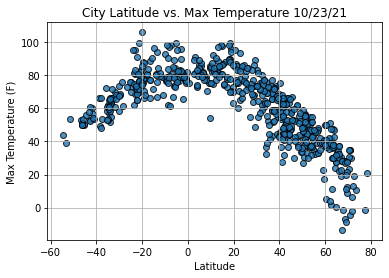

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

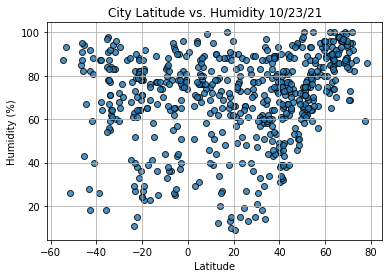

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

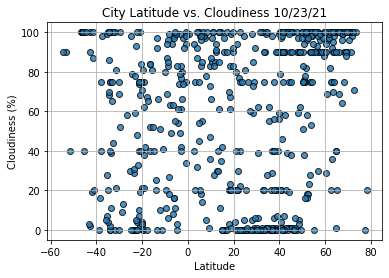

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

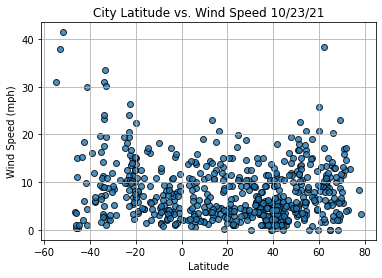

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope,intercept,r_value,p_value,std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values*slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()  

In [35]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Antonio,JM,2021-10-23 16:16:20,18.1800,-76.4612,89.94,70,67,13.15
1,Diebougou,BF,2021-10-23 16:16:20,10.9667,-3.2500,92.26,39,100,7.61
4,Tubuala,PA,2021-10-23 16:16:21,9.5167,-79.0333,84.33,75,83,1.79
5,Atar,MR,2021-10-23 16:16:22,20.5169,-13.0499,95.14,9,4,4.54
7,Narsaq,GL,2021-10-23 16:16:23,60.9167,-46.0500,37.62,80,96,1.68


In [36]:
north_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
south_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [25]:
# x_values = north_hemi_df["Lat"]
# y_values = south_hemi_df["Max Temp"]

# # Call the function.
# plot_linear_regression(x_values, y_values, "Linear Regression on Northern Hemisphere for Maximum Temperature",
#                        "Max Temp",(10,40))

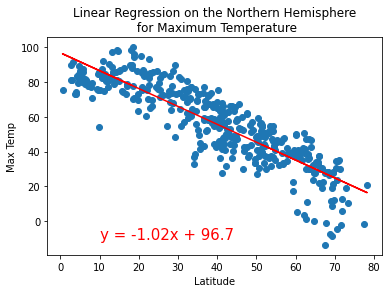

In [46]:
# Linear regression on the Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,-10))

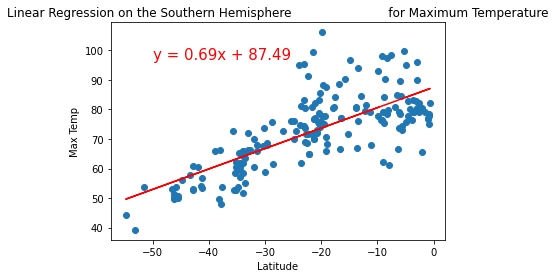

In [38]:
# Linear regression on the Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,97))

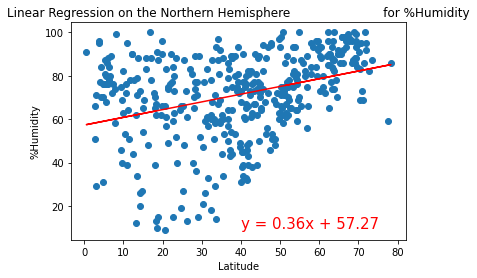

In [39]:
# Linear regression on the Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for %Humidity', '%Humidity',(40,10))

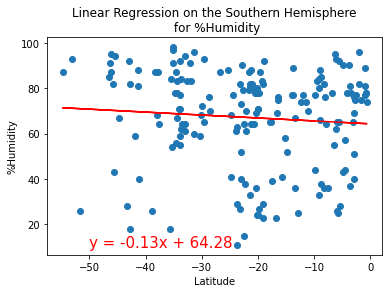

In [47]:
# Linear regression on the Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for %Humidity', '%Humidity',(-50,10))

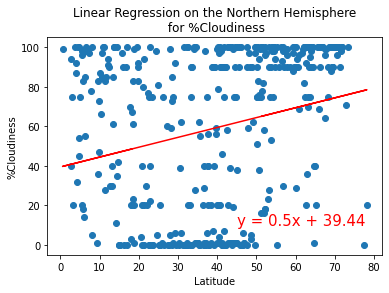

In [48]:
# Linear regression on the Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for %Cloudiness', '%Cloudiness',(45,10))

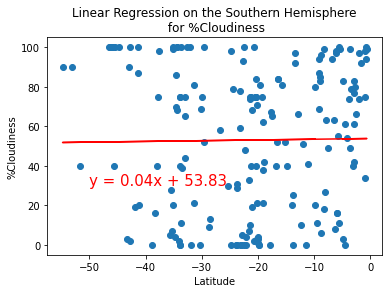

In [49]:
# Linear regression on the Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for %Cloudiness', '%Cloudiness',(-50,30))

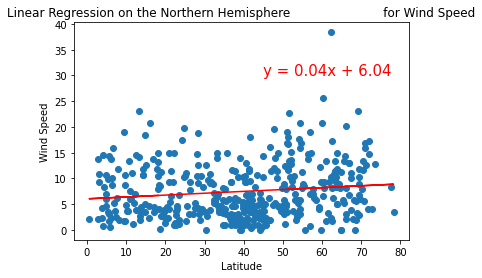

In [43]:
# Linear regression on the Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for Wind Speed', 'Wind Speed',(45,30))

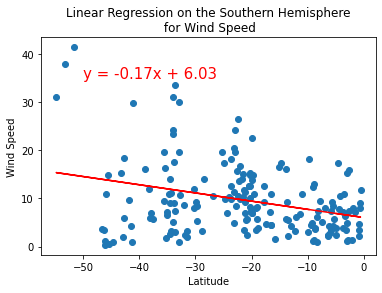

In [51]:
# Linear regression on the Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-50,35))